<a href="https://colab.research.google.com/github/jcdumlao14/My-Notes-ml-zoomcamp2022/blob/main/Week8_1a_notes_ML_NeuralNetworks%26Deep_Learning_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8. Neural Networks and Deep Learning**

This week, we'll learn about neural nets and build a model for classifying images of clothes



## **8.1 Fashion classification** (video 1)

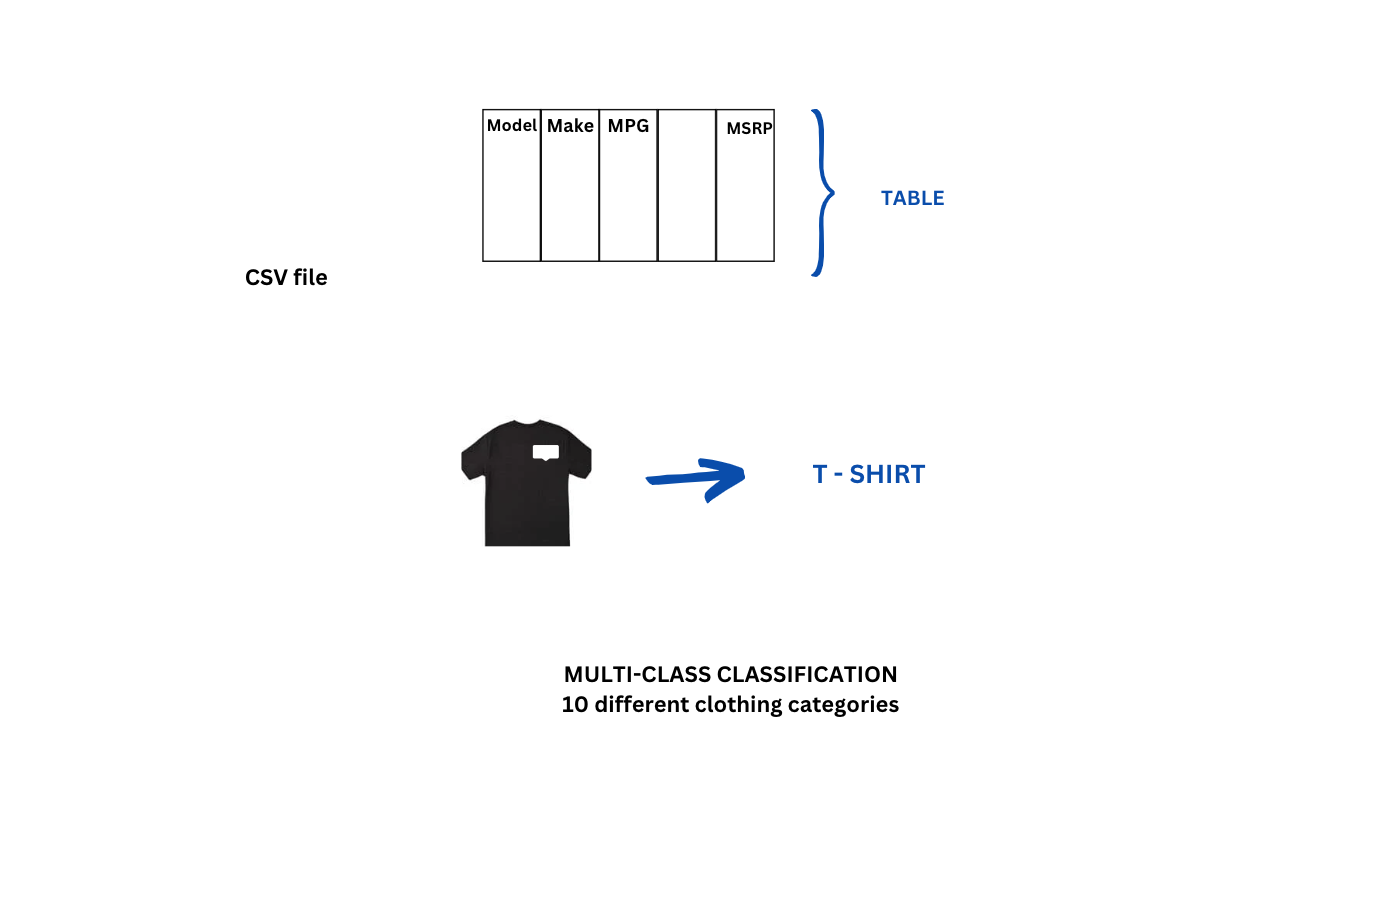

* In Previous sessions we talked about tabular data so popular data look like we have a table, it was usually a CSV file and we have some columns there with different values so for example in session 2 talking about predicting the price of a car we had columns like a model, makes, miles per gallon, city miles per gallon, gallon outside of the city and the manufactures suggested a retail price which was the price we were trying to predict. a table the methods we used like linear regression, logistic regression three based models were all for tabular data.
* We will look at a different kind of data we wil look at images and this is the kind of images we will be dealing with in this session these will be images of clauses and we want to predict that in this particular case this is an image of a **t-shirt** so the project we will do will be a classification project it will be a multi-class classification, we will build a model that will tell it an image belongs to one of ten different clothing categories.

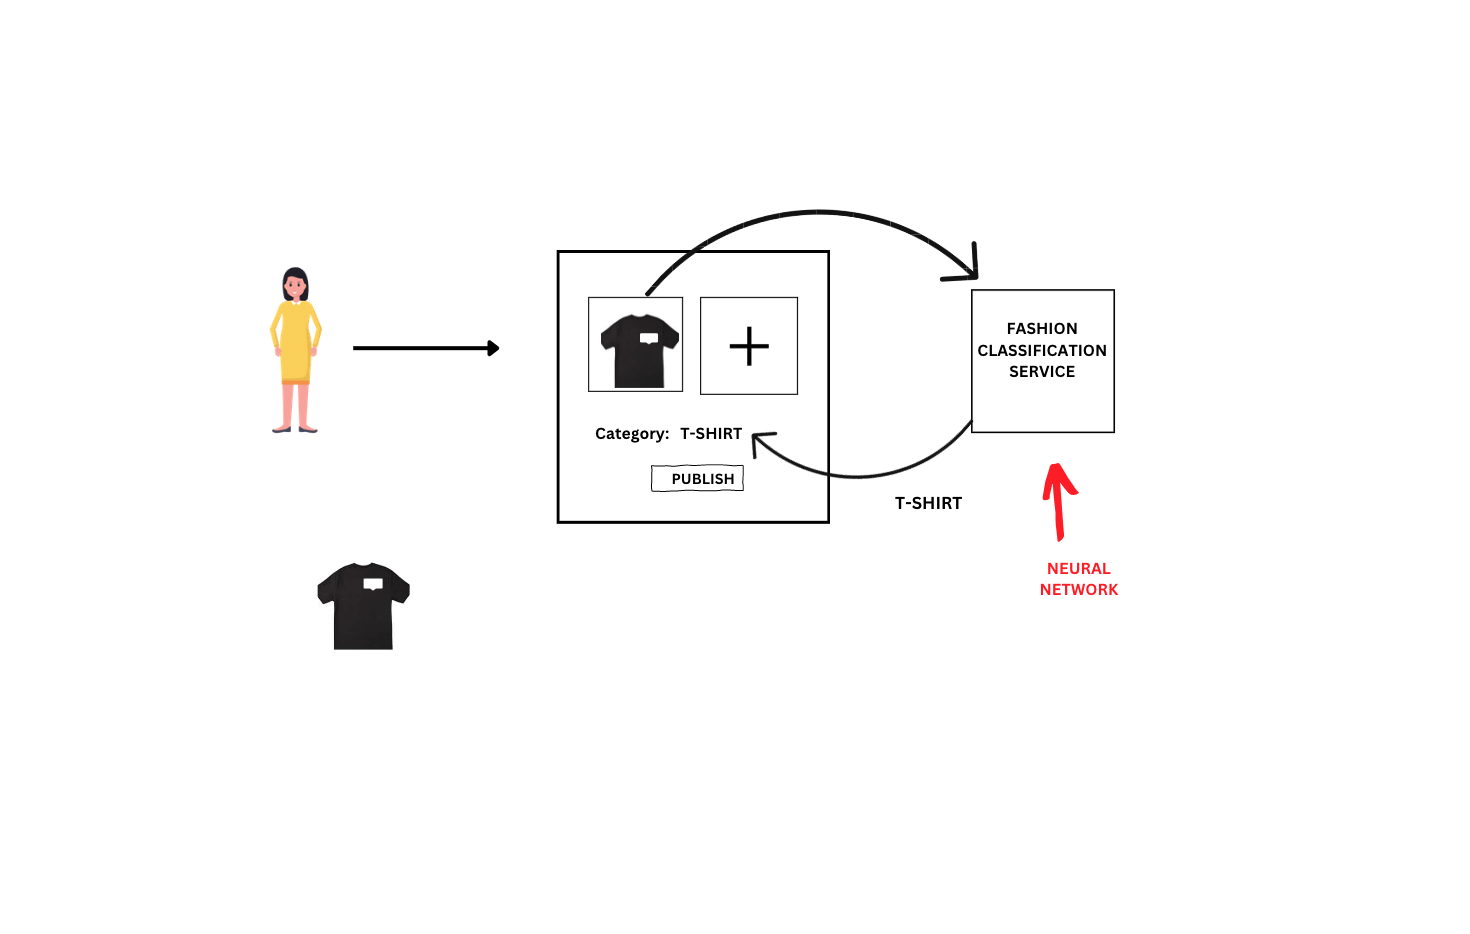

* The online classified website and the user comes to website and they want to create listing in the fashion category so let's say user wants to sell a t-shirt so they come to our wibsite they upload a picture to this t-shirt so there's a place where they can upload pictures which look like that users just click on this the box and then they get to upload an image the user we have they get this picture they upload it and what we want to do is we want to have a service that we can call fashion classification serivce so this service will get this picture and it will reply with a suggested category so the user pulls the picture and then we automatically suggested that the category is a t-shirt this way will help the user to select the category faster for them all they need to do will be just upload a picture and then just click publish so our goal is to make it simpler for the user to create a listing for this purpose we will use a model so this fashion classification service will contain a neural network and this neural network will look at the image and will predict a category of this image.
* We will use for training this model is a clothing dataset inflation dataset.
* Over 5,000 images of the over 20 different classes but who will not use this particular dataset we will use a smaller dataset a subset of this dataset which contains the 10 most popular classes from the dataset we already have train validation and test folder here in which there are different images say if we go to the train dataset we have 10 different folders and each folder contains images of this specific category so if go to t-shirt let me just pick one of the shirts if we pick any pick some other file.

* Let's say this one is also a t-shirt I already cloned this dataset so actually to get this dataset, what you need to do is go to I have it linked so this is the report **small dataset** just click on this and you get the address and then you clone it, I already cloned it so have here we have training we have validation we have the test if we go to train there are these 10 different folders so we have categories like this hats, long sleeves, outwear pens shirt, skirts, and t-shirt and here if you go to cuts it's mostly cupped this looks like we have in validation we have the same 10 categories and we have images there are different images so we don't need to do a train, test, or validation split here we already have done the split this is what we will use for training a model here.
*  We put more emphasis on the particular part and neural networks are quite complex there's a lot of theory behind how they work it's not possible to cover it in just a few hours so that's why I will show how to train such a model, but I will not be able to cover all the theoretical foundation of neural networks for that if you're interested in knowing in learning how they work you can go to this links:https://cs231n.github.io/

* This is of course from Stanford which is which goes into detail about how Neural Networks and in particular convolutional neural networks for images for visual recognition work there the notes here are quite good there are also videos and if you're interested in theory you can go there sometimes.

In [ ]:
%autosave 0

Autosave disabled


Dataset:

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [ ]:
#!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 17.83 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Checking out files: 100% (3783/3783), done.


## **8.1b Setting up the Environment on Saturn Cloud** (video 1b)



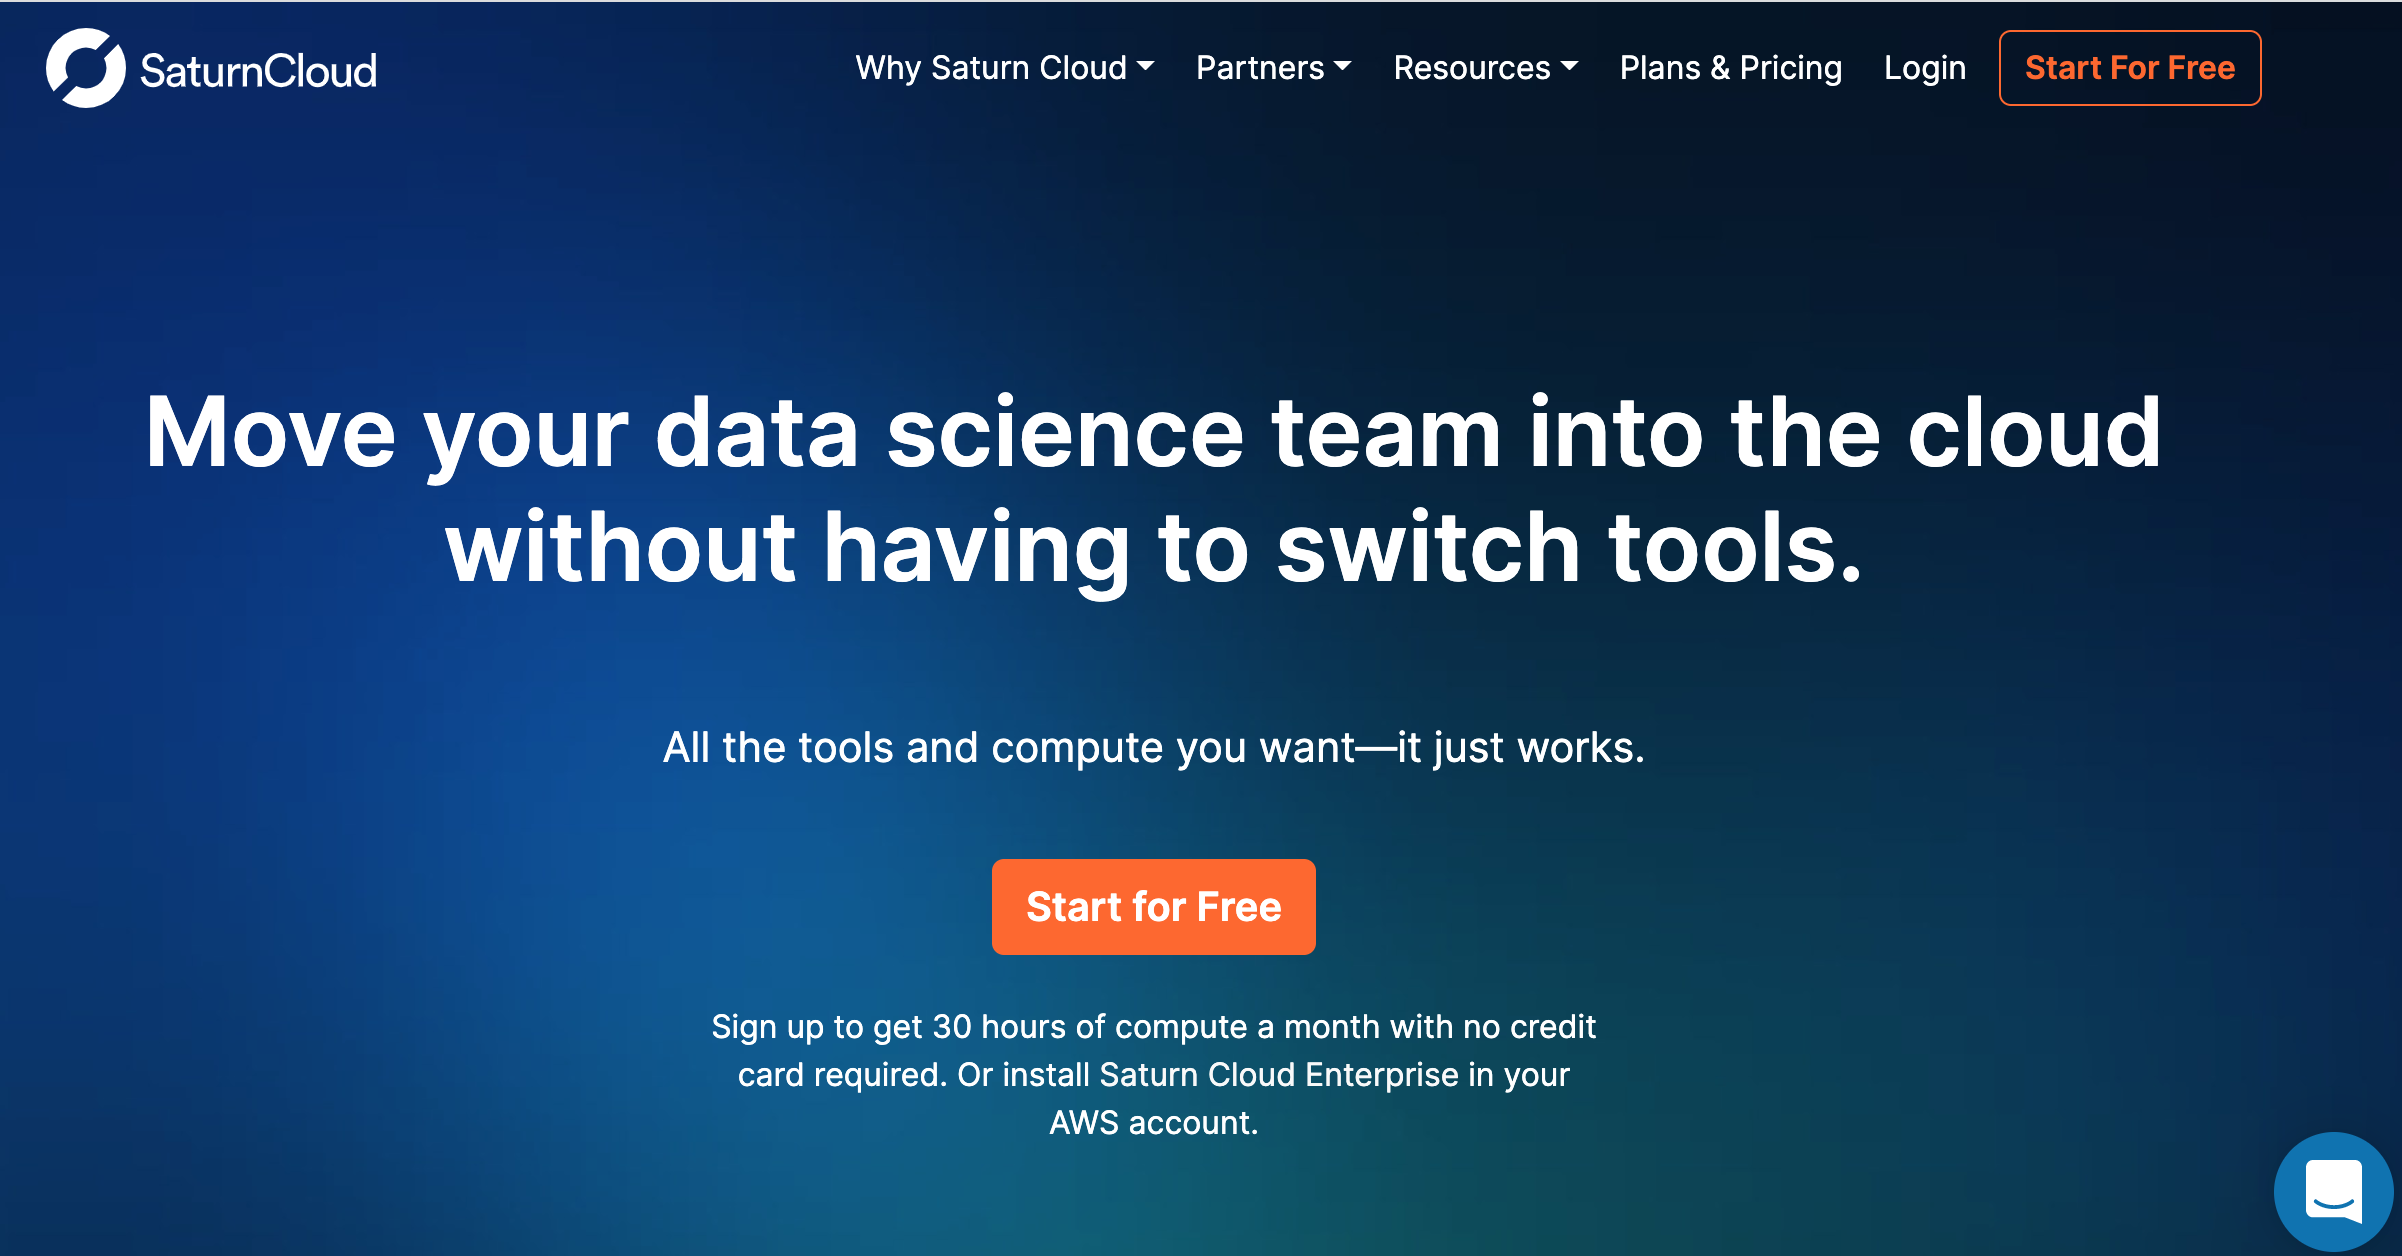

* Saturn Cloud offers notebooks with GPUs and note that this link has a UTM tag.
* Sign up to Saturn cloud using this link
* Login
* Now to set up the environment for this model
* Save the results using git if you want to push your notebooks to GitHub.
* You need to configure SSH
* Go to secret and create a secret 
* click on new
* Add Secret
  * Owner
  * Name 
  * value
  * Add
* Go to the terminal for the SSH location.
    * If you have one already just copy the file name and paste it into the name box.
* Copy from SSH to paste it to Saturn cloud value and just add any character at the end of the line put a Dot on it, the dot is fine, and then click add.
* Go back to Resources then click on it.
  * click New Resources from a template then select template with Tensorflow
* Click Tensorflow
  * Create Resource
  * put the name of the file
  * then click Create
* Then click edit
  * then specify a requirements.txt file and extra packages, we want to install, we only need to install scipy only one extra package.
  * then save it
* Go to secret and add a secret file we just created here.
  * Then click Attached Secret file
      * Secret 
      * File Path = /home/jovyan/.ssh/default
      * Discription = ssh key for github
      * Create - then click create botton
* Go to overview then click start
* Click jupyter notebook
* Go to terminal
  * To test the connection
      * $ ssh -T git@github.com
      * $ git init
      * $ ls
      * $ git add README.md single-gpu-tensorflow.ipynb
      * $ git commit -m 'initial commit'
      * $ git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## **8.2 TensorFlow and Keras** (video 2)

* **What TensorFlow is used for?**
The TensorFlow platform helps you implement best practices for data automation, model tracking, performance monitoring, and model retraining. Using production-level tools to automate and track model training over the lifetime of a product, service, or business process is critical to success.
* **Tensorflow and Keras** -TensorFlow is an open-sourced end-to-end platform, a library for multiple machine learning tasks, while Keras is a high-level neural network library that runs on top of TensorFlow. Both provide high-level APIs used for easily building and training models, but Keras is more user-friendly because it's built-in Python.
* Tensorflow is a library for deep learning.

* We have TensorFlow the inside TensorFlow we have Keras which is a library that provides higher-level abstraction which makes it simpler to create train and use neural networks, install TensorFlow

* Installing TensorFlow
* Loading images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

#import warnings 
#warnings.filterwarnings("ignore")

In [ ]:
#!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
fullname

'./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

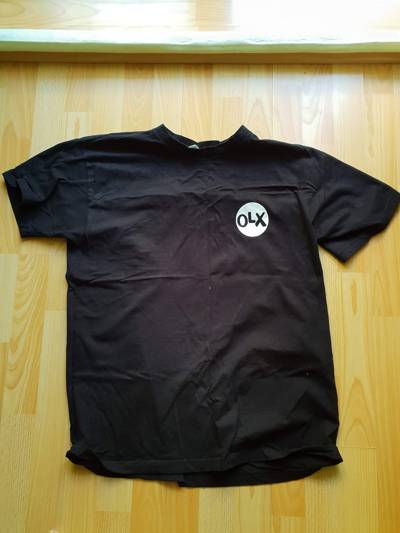

In [ ]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

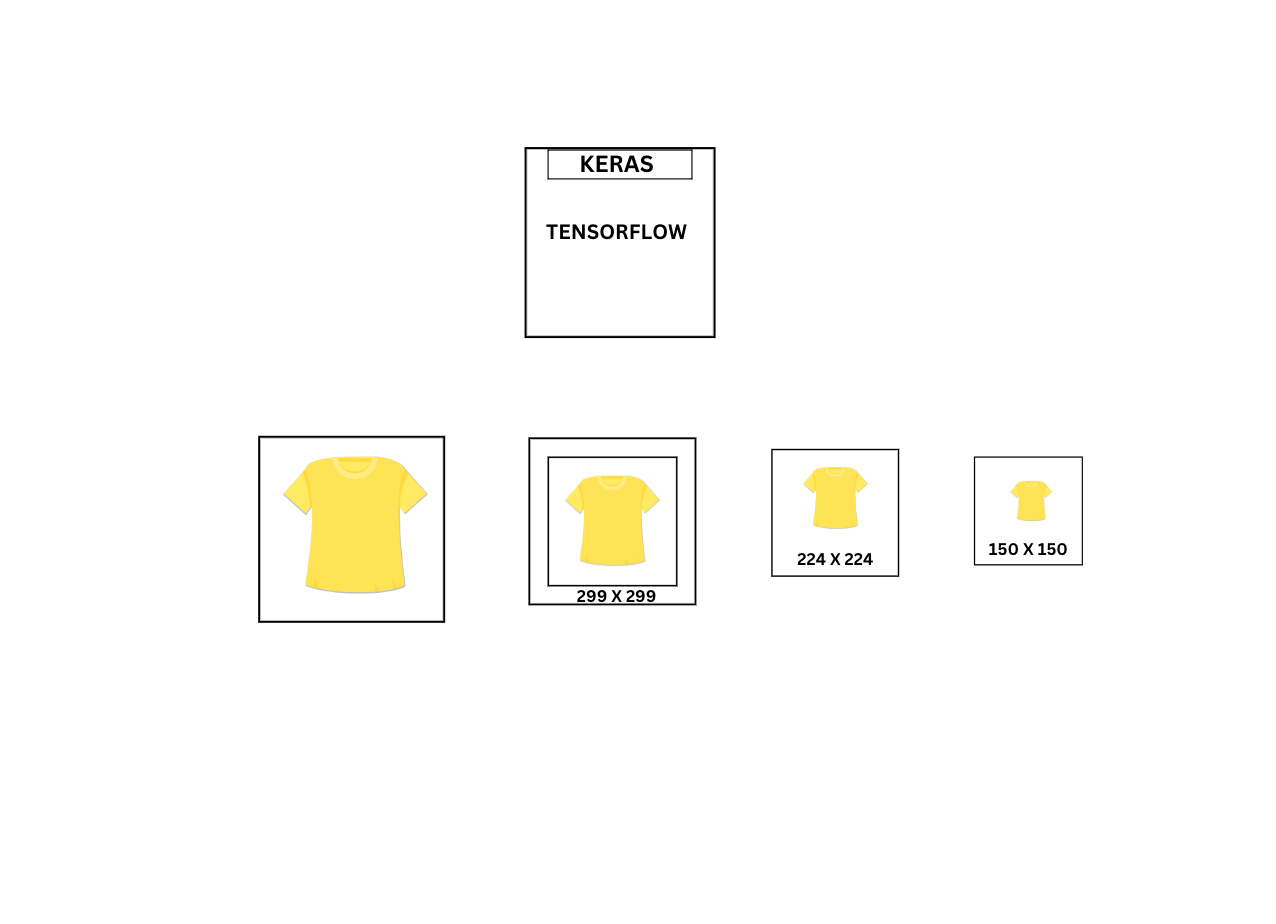

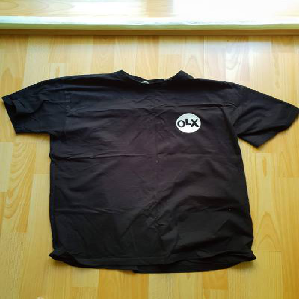

In [ ]:
load_img(fullname, target_size=(299, 299))

* We have a remote image and if we have an image that is quite large, let's say this t-shirt and then resize the t-shirt to one of these formats, so let's see this one and we do that we can just specify the target size say 299 by 299. this is what it looks like. 

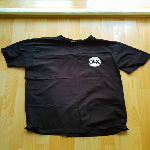

In [ ]:
#load_img(fullname, target_size=(150, 150))

In [ ]:
#img = load_img(fullname, target_size=(150, 150))

In [ ]:
#print(img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x7FCFF484F250>


* If we want 150 by 150 then we get a small image we can save this image into a variable so the library for processing images is called **PIL** it stands for **Python Image Library** something like this is what many libraries use for processing images.

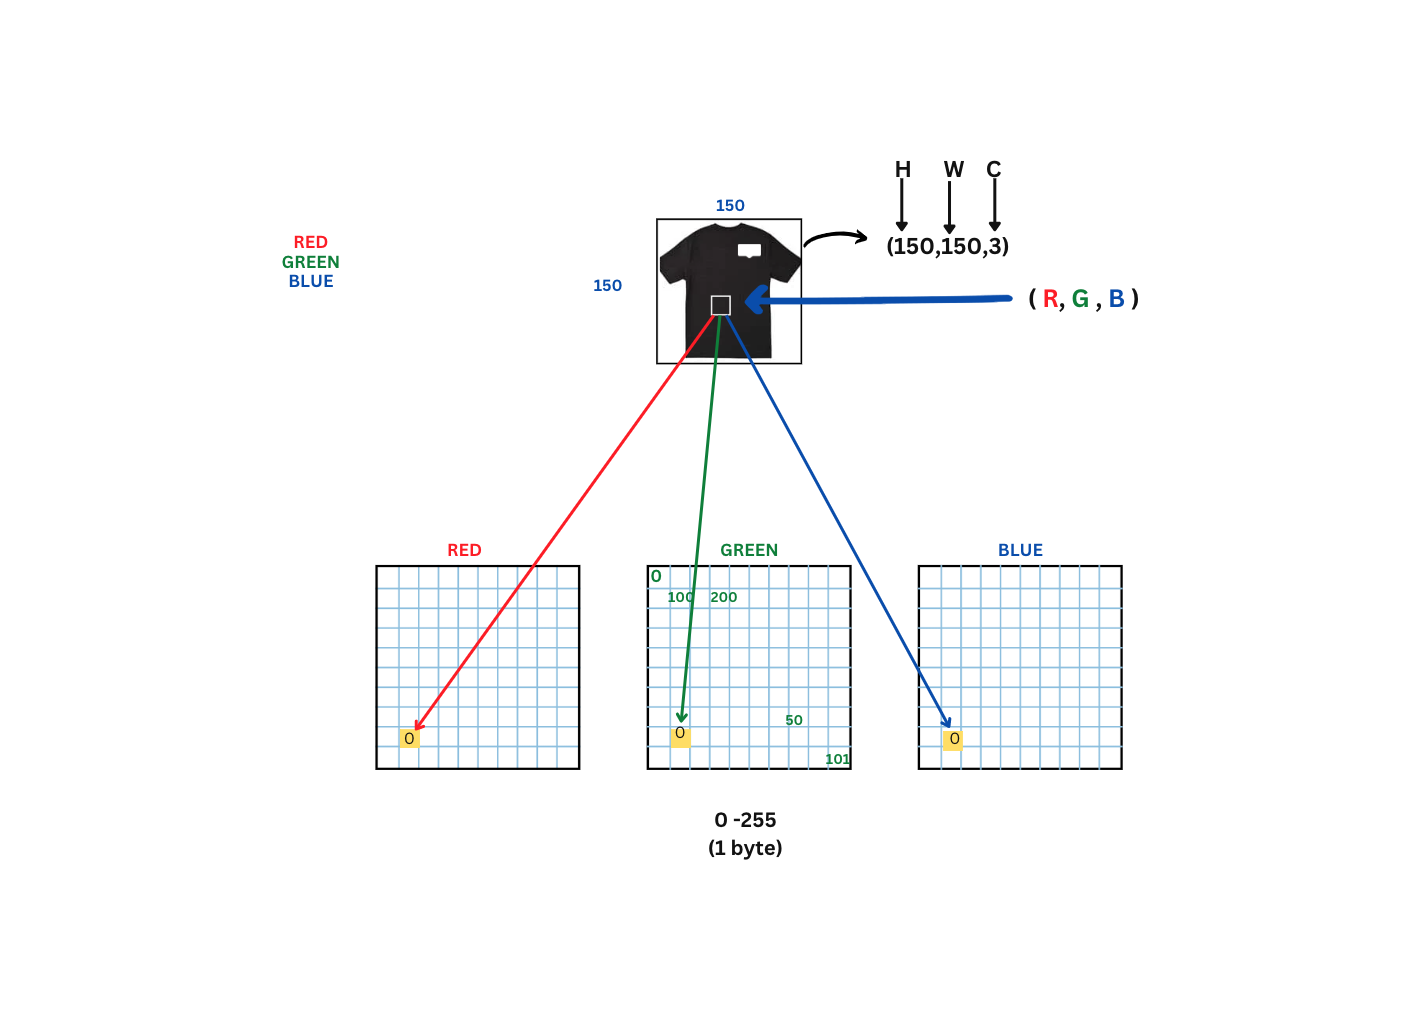

* The way the image is represented internally it's just a NumPy array not necessarily a NumPy array but an array with three channels we have a red channel for the green channel and we have a blue channel, and for each of these channels we have an array and this array contains numbers between 0 and 255 which is one byte so each cell is a number this let's say this is green, the green channel so we have numbers so maybe zero, one hundred, two hundred, five hundred, two hundred fifty (250) so on, 101 that can be any number between 0 and 255 then we have three such we have red and we have blue and then say if we take this pixel over here a cell somewhere here it corresponds to it this arrow blue this value here would be a combination of three things it will be first the value from the red channel then the value from the green channel then the value from the blue channel, so since this one is almost black so it has probably almost zero in all these three channels this how images are encoded internally and in our case, it will be an array of size, let's say if we have 150,150, three channels so the shape of this array will 150 by 150 by 3 so there is height there is the width and three is a number of channels.

In [ ]:
#np.array(img)

array([[[177, 168,  99],
        [178, 169, 100],
        [182, 173, 104],
        ...,
        [251, 253, 250],
        [251, 253, 248],
        [251, 253, 248]],

       [[200, 190, 129],
        [203, 193, 132],
        [203, 193, 132],
        ...,
        [250, 251, 246],
        [250, 251, 245],
        [250, 251, 245]],

       [[200, 189, 133],
        [203, 192, 136],
        [202, 191, 135],
        ...,
        [251, 250, 245],
        [250, 250, 242],
        [249, 249, 239]],

       ...,

       [[171, 157,  82],
        [170, 156,  81],
        [171, 157,  82],
        ...,
        [185, 141,  32],
        [180, 133,  25],
        [182, 135,  27]],

       [[171, 157,  82],
        [170, 156,  81],
        [171, 157,  82],
        ...,
        [187, 143,  34],
        [179, 132,  24],
        [181, 134,  26]],

       [[170, 156,  81],
        [171, 157,  82],
        [170, 156,  81],
        ...,
        [184, 138,  26],
        [182, 134,  23],
        [181, 133,  22]]


             Red  Green  Blue
    array([[[177,  168,   99],
     
        [178, 169, 100],

        [182, 173, 104],
        ...,
        [251, 253, 250],

        [251, 253, 248],

        [251, 253, 248]],
        

* We can easily translate the pillow image into a NumPy array using just wrapping the images just putting the image in this NumPy array and what we have here seen in each of these rows is r g b is a pixel with an RGB **[177,168,99] (R, G, B)** RGB values so the first one is r red the second one is green and then the third one is blue, we have 150 by 150 of them so quite a few and each of these rows is a pixel just one pixel.

In [ ]:
#x = np.array(img)
x.shape


(150, 150, 3)

In [ ]:
#x

array([[[177, 168,  99],
        [178, 169, 100],
        [182, 173, 104],
        ...,
        [251, 253, 250],
        [251, 253, 248],
        [251, 253, 248]],

       [[200, 190, 129],
        [203, 193, 132],
        [203, 193, 132],
        ...,
        [250, 251, 246],
        [250, 251, 245],
        [250, 251, 245]],

       [[200, 189, 133],
        [203, 192, 136],
        [202, 191, 135],
        ...,
        [251, 250, 245],
        [250, 250, 242],
        [249, 249, 239]],

       ...,

       [[171, 157,  82],
        [170, 156,  81],
        [171, 157,  82],
        ...,
        [185, 141,  32],
        [180, 133,  25],
        [182, 135,  27]],

       [[171, 157,  82],
        [170, 156,  81],
        [171, 157,  82],
        ...,
        [187, 143,  34],
        [179, 132,  24],
        [181, 134,  26]],

       [[170, 156,  81],
        [171, 157,  82],
        [170, 156,  81],
        ...,
        [184, 138,  26],
        [182, 134,  23],
        [181, 133,  22]]

* unit8 = it **u means unsigned** so it doesn't have a sign so it goes from 0 to 255 not from -127 to 128 but from 0 to 255 and then int8, eight means that it's an integer that takes eight bits or one byte, so this is our image and this is how we turn an image into a NumPy.

In [ ]:
img = load_img(fullname, target_size=(299, 299))


In [ ]:
x = np.array(img)
x.shape


(299, 299, 3)

In [ ]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## **8.3 Pre-trained convolutional neural networks** (video 3)

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


## **ImageNet Data**

* The most highly-used subset of ImageNet is the [ImageNet Large Scale Visual Recognition Challenge (ILSVRC)](https://www.image-net.org/challenges/LSVRC/index.php) 2012-2017 image classification and localization dataset. This dataset spans 1000 object classes and contains 1,281,167 training images, 50,000 validation images, and 100,000 test images. This subset is available on [Kaggle](https://www.kaggle.com/c/imagenet-object-localization-challenge/overview/description).

## **Keras Applications**

* Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.[Keras Applications Available Models(Xception)](https://keras.io/api/applications/)


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(
    weights='imagenet', 
    input_shape=(299, 299, 3)
)


In [ ]:
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [ ]:
X = np.array([x])

In [ ]:
X.shape

(1, 299, 299, 3)

In [ ]:
#X = np.array([x,x,x])

In [ ]:
#X.shape

(3, 299, 299, 3)

In [ ]:
#model.predict()

TypeError: ignored

In [ ]:
#model.predict(X)

1/1 [==============================] - 1s 751ms/step


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
X = preprocess_input(X)

In [ ]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [ ]:
model.predict(X)

1/1 [==============================] - 1s 644ms/step


array([[3.23797984e-04, 1.57364309e-04, 2.14056068e-04, 1.52957378e-04,
        2.46565673e-04, 3.04462417e-04, 3.23487475e-04, 1.47259663e-04,
        2.04866097e-04, 1.48656152e-04, 1.95694069e-04, 2.11569102e-04,
        7.61278425e-05, 1.14591581e-04, 1.64077399e-04, 2.07021410e-04,
        1.96368012e-04, 1.44514721e-04, 1.40078628e-04, 1.73651686e-04,
        7.50312582e-04, 2.55688617e-04, 2.66562653e-04, 2.96249927e-04,
        3.71849019e-04, 2.81153480e-04, 2.16759698e-04, 2.26841803e-04,
        3.82646278e-04, 1.72122935e-04, 3.08604154e-04, 1.97759669e-04,
        3.93641938e-04, 4.78195900e-04, 2.90634373e-04, 3.26480600e-04,
        1.47040177e-04, 1.63522069e-04, 2.14072599e-04, 1.34214759e-04,
        2.41729897e-04, 6.72481954e-04, 2.53319769e-04, 1.42904100e-04,
        4.11025831e-04, 2.05692239e-04, 3.04202549e-04, 1.49993633e-04,
        2.00595197e-04, 2.28324730e-04, 2.97196646e-04, 2.30766993e-04,
        6.29546354e-04, 7.80995237e-04, 2.47868011e-04, 4.030103

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 1s 640ms/step


In [ ]:
pred.shape

(1, 1000)

In [ ]:
pred[0, :10]

array([0.0003238 , 0.00015736, 0.00021406, 0.00015296, 0.00024657,
       0.00030446, 0.00032349, 0.00014726, 0.00020487, 0.00014866],
      dtype=float32)

In [ ]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.03960036),
  ('n04370456', 'sweatshirt', 0.035299573),
  ('n03710637', 'maillot', 0.01088412),
  ('n04525038', 'velvet', 0.0018057581)]]

## **8.4 Convolutional neural networks** (video 4)

* Types of layers: convolutional and dense
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/



* Convolutional neural networks are specialized types of artificial neural networks that use a mathematical operation called [convolution](https://en.wikipedia.org/wiki/Convolution) in place of general matrix multiplication in at least one of their layers. They are specifically designed to process pixel data and are used in image recognition and processing.

* A convolutional neural network consists of an input layer, [hidden layers](https://en.wikipedia.org/wiki/Multilayer_perceptron#Layers) and an output layer. In any feed-forward neural network, any middle layers are called hidden because their inputs and outputs are masked by the activation function and final [convolution](https://en.wikipedia.org/wiki/Convolution). In a convolutional neural network, the hidden layers include layers that perform convolutions. Typically this includes a layer that performs a [dot product](https://en.wikipedia.org/wiki/Dot_product) of the convolution kernel with the layer's input matrix. This product is usually the [Frobenius inner product](https://en.wikipedia.org/wiki/Frobenius_inner_product), and its activation function is commonly [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)). As the convolution kernel slides along the input matrix for the layer, the convolution operation generates a feature map, which in turn contributes to the input of the next layer. This is followed by other layers such as pooling layers, fully connected layers, and normalization layers.

* Convolutional neural networks are the type of neural networks that are used for images mostly and they consist of different types of layers one of them is called the convolutional layer that's why they have this name and I will give you some intuition on how they work and the model we used xception model is a convolutional neural network.

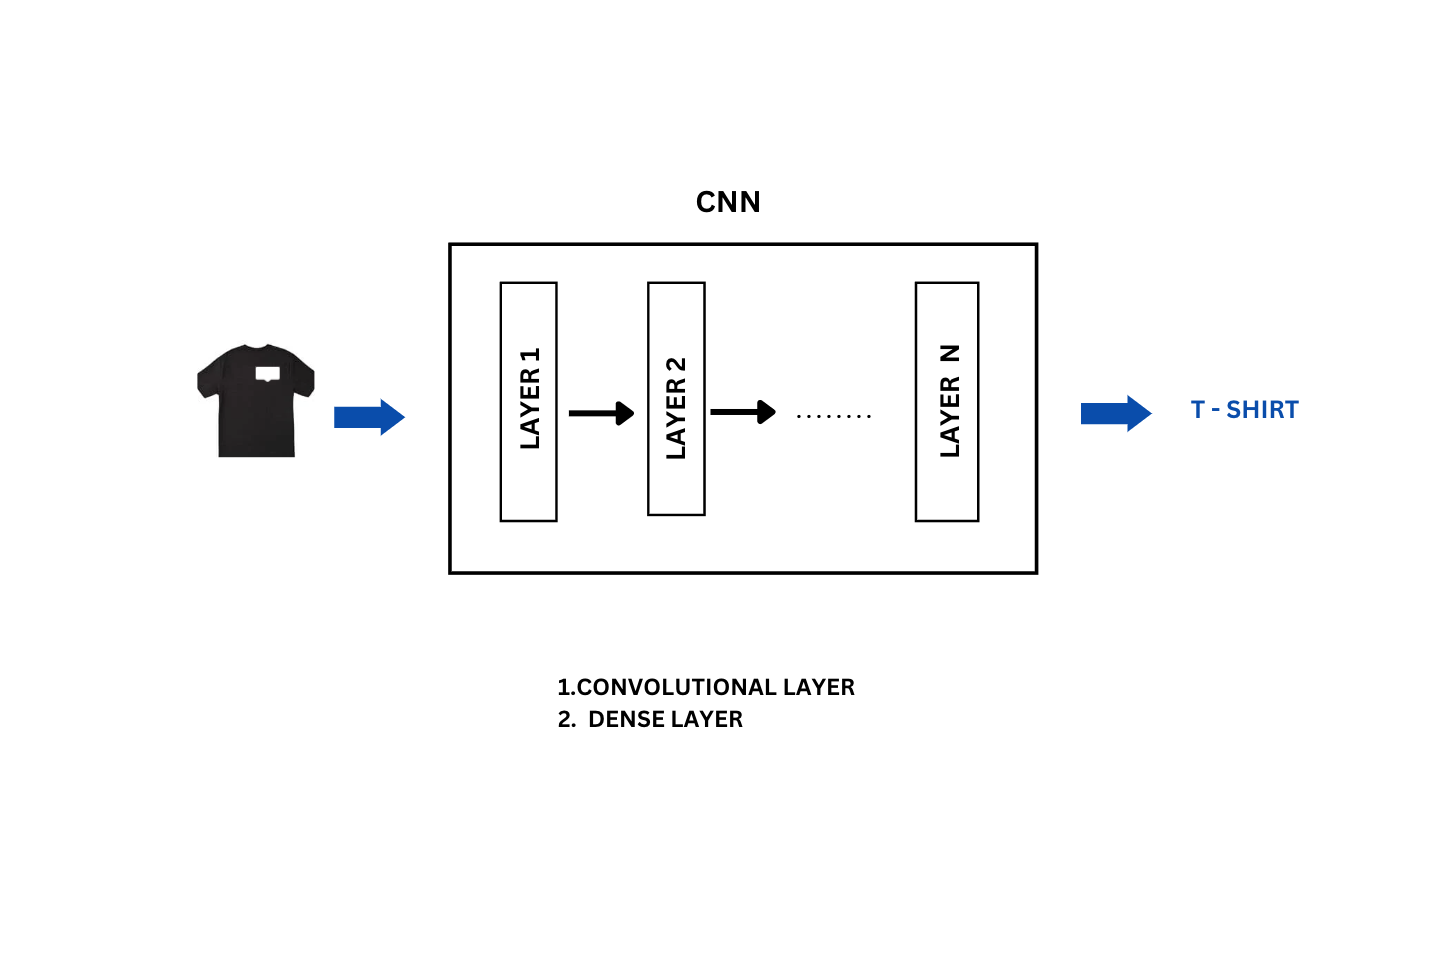

* Convolutional neural network to predict what kind of image it is, what kind of the whole thing is there so let's say we have a neural network so this is our so ill call it cnn which is short for Convolutional Neural Network, let's say it's a black box it gets an image, and then outputs prediction, what happens inside is that there are different kinds of layers, layer one, layer two, and so on there could be quite a few of them, this one is n two main types of layers for the convolutional neural network the first are convolutional layers, second is a dense layer, so let's first talk about convolutional layers.

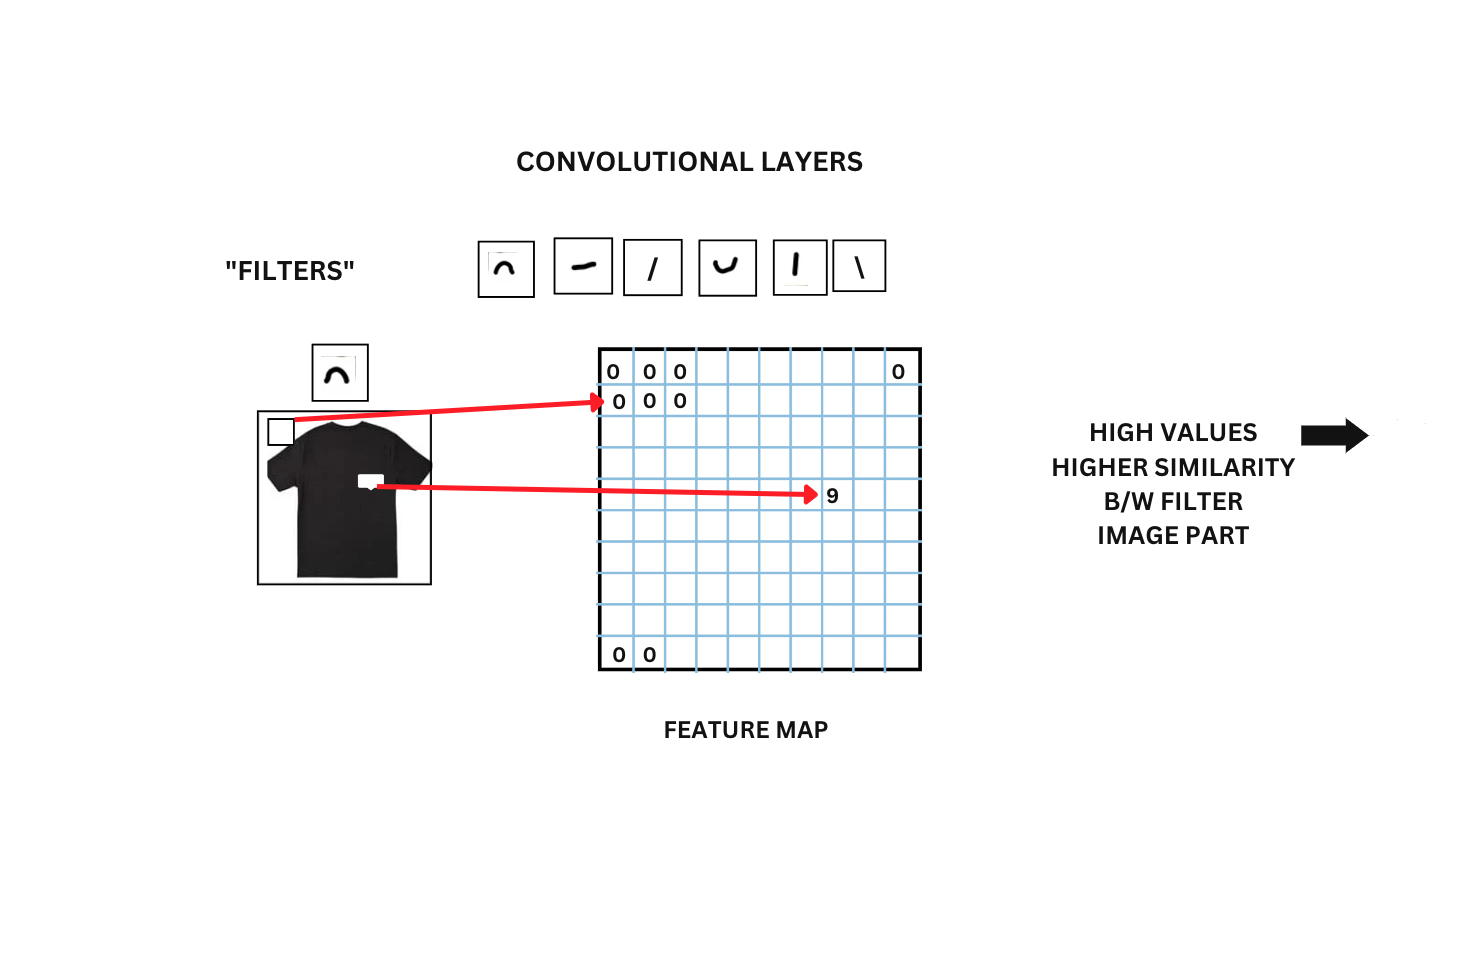

* Convolutional layers consist of filters that are kind of small images, they're usually quite small images like 5x5 could be even smaller and there are quite a few of them let's say six for this example these images filters contain simple shapes like this n - / u | \  simple lines simple shape this is just an example this is not from an ideal network it's just to give you some understanding what might be happening inside the neural network so we have these filters and then we take our image this t-shirt, we take our image we take a filter and we slide this filter across the image and every time we apply the filter to an image we see how similar this filter is to the part of image, let's say we have this table and when we slide our filter across the image each cell here in this table corresponds to a particular position on the filter on the image and then we take the filter and take the part of theimage where this filter is or right now and we calculate a similarity between them this is just a number zero usually means no similarity and then some higher number let's say nine then or whatever it means bigger similarity so we take this image and then for each position we see okay here it's zero again it's not really similar and so on right so we slide it the first row right and we do the second row it's again not super similar and so on, maybe we see this part right so this is like a circle so when this image is here then with this filter is here perhaps with corresponding part of this table will be somewhat similar right and then the rest icon remove is not really similar so maybe the rest will be zeros as well this array is called a  feature map and this feature map is the result of applying a filter to an image so we slide a filter across the image and every time we calculate the similarity between this particular filter and the part of the image we record the result we get this feature map and high values mean higher degree of similarity between the filter and the part of the image for this filter this part here corresponds to this cell and this part here is not similar then that's why it's zero right we do this for each filter here we have six filters and for each filter feature map.

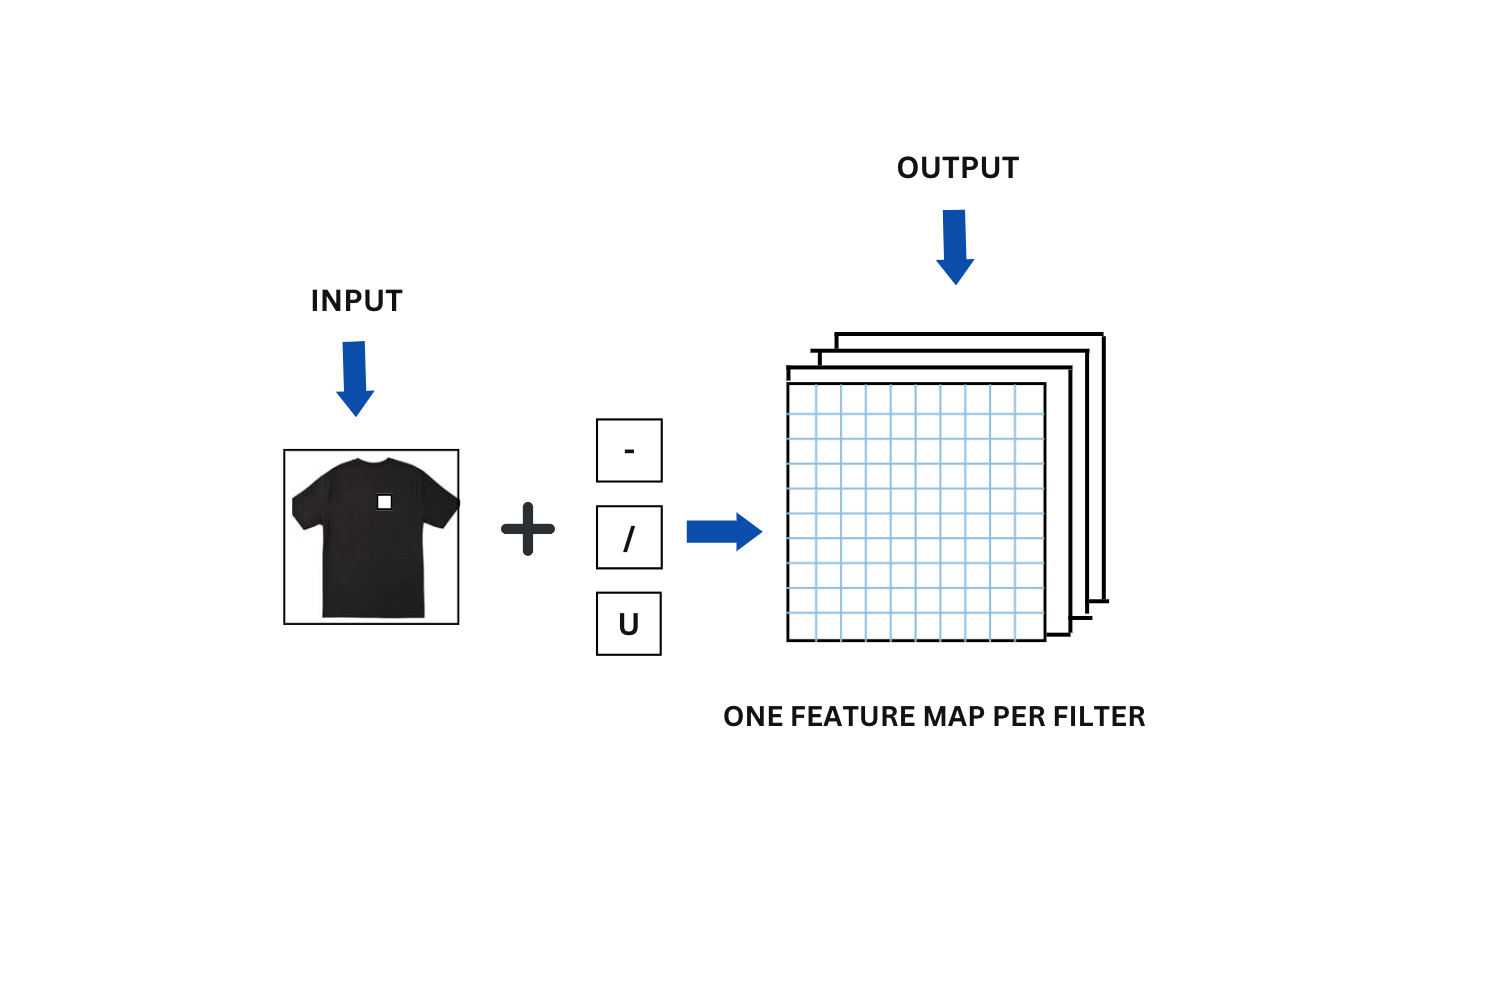

* So we take our image we take the filters and then as the result we have multiple feature maps so it's one feature map per filter the input is the image right and the output is feature maps as many as there are filters.

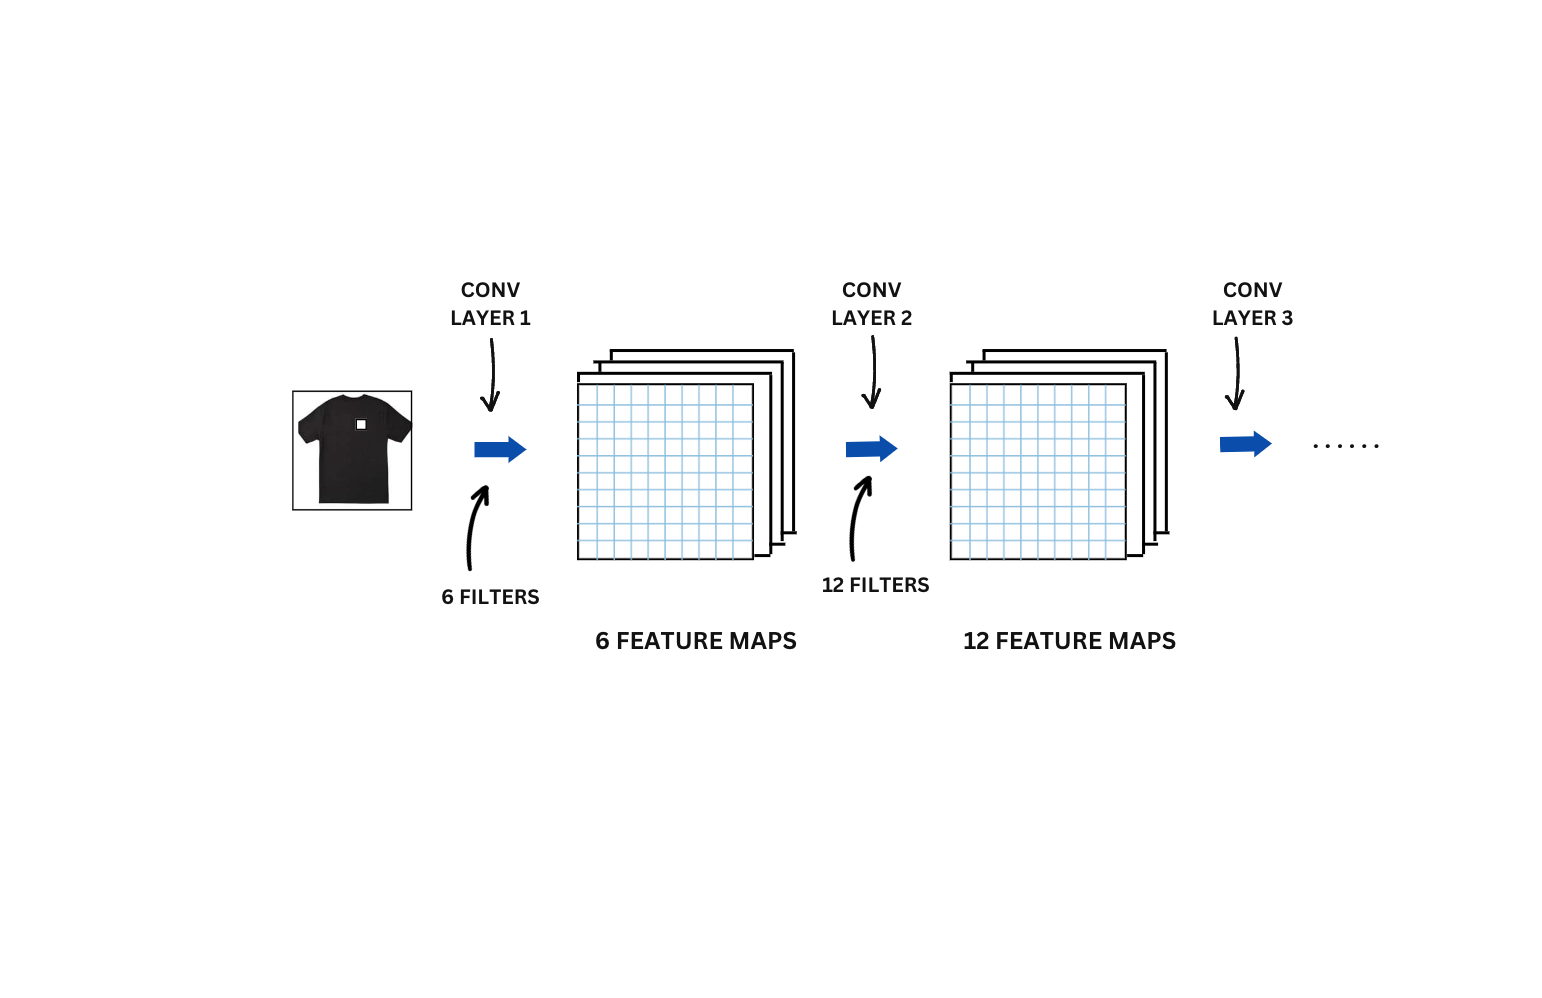

* So the output of the first convolutional layer is a set of feature maps but then we can take this output and we can treat it as an image a new image an image that we made from the original one and then we can have another convolutional layer this convolutional layer has its own set of filter it applies these filters to the image hot the original image but the one that first convolutional layer produced and then it produces it own feature map may be in the first case we had six feature maps because there are six filters but maybe the second one has 12 filters so it produces 12 feature maps we can keep going then there could be a third convolution layer with its own set of filter that produces a bunch of other feature maps.

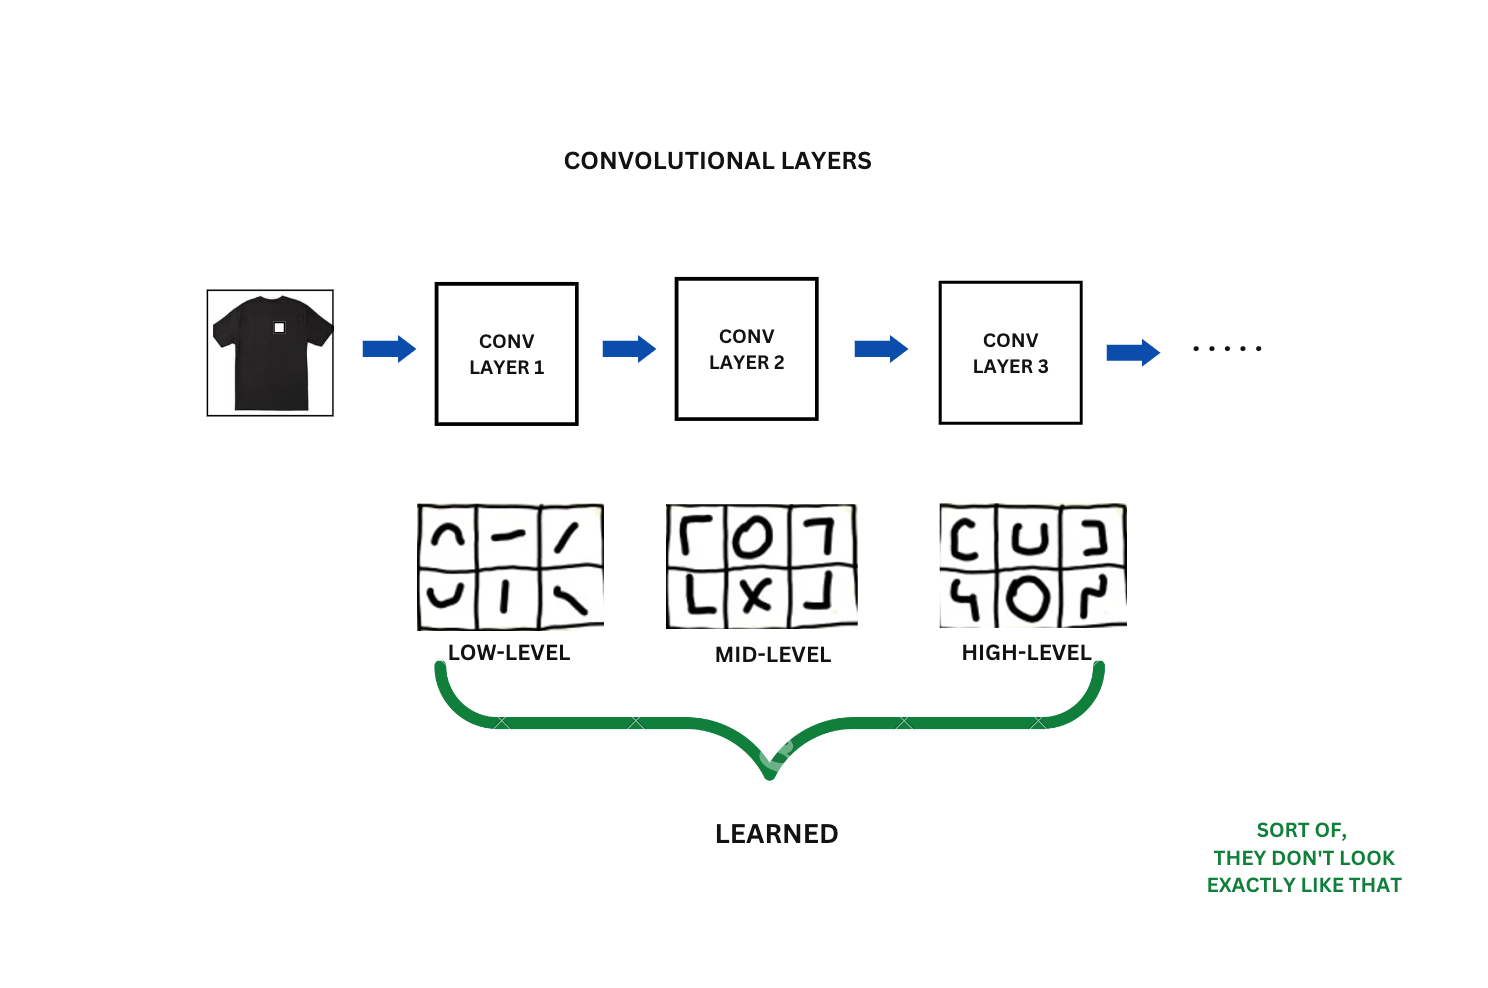

* Because of this chaining each layer learns more and more complex filters these are something that a neural network learns during training so each convolutional layer can get a more and more complex filter for example the first layer is a convolutional conditional layer we can have three of them let's see this conditional there one two and three.
* The first layer turns simple filters so these filters could be simple shapes like just stripes, but in the second and the third layer the filters it learns can become more and more complex for example this one can have some angles maybe circles crosses and so on and the way the second layer learns these filters is by combining the filter from the previous layer for example a circle can be a combination of these two we put them together (green) and we get a circle so the features of an image this is not exactly how filter look like but we can think of them in this way because actually what filters do it.

* Across all the values of all the feature maps in this particular region so it kind of goes in depth here it looks at all different feature maps so for example one feature map can be this / and then the other feature map maybe this one \ and if we see that they are together the first feature map has high similarity I don't know number six her 6 and then the second one also has number six(6) somewhere close then we see okay they both have high value here it means that it can form across.

* And in the same way the higher level filter from the third layer they're using the feature map from the latter two this way the more layers we have the more complex features we can capture from the image and remember that all these things are learned don't need to sit there and tell a neural network they make this kind of line it just learns them automatically, so the angle could be a combination of these two(red) and every angle could be a combination of these two and put them differently and the cross could be a combination of this blue arrow and this so you have these simple shapes and then you combine them and you get more complex shapes then by the third layer you have even more complex shapes.
* The first convolutional layer can recognize simple patterns so it can recognize this kind of stripes for this part here this will get activated get high similarity this array here will have high similarity with this shape and then once we pass the image through the first convolutional layer we get a feature map and using this information we can detect more complex shapes.

* Here, for example, we can detect a circle, or here we can detect these angles, and so on and in the third layer.

* We can maybe already detect sleeves and so this thing perhaps and so on each layer can detect progressively more and more complex features this lower-level, mid-level, and these are more high-level features of the image and by feature I mean there are sleeves or there is a circle in the specific area of the image these are the sort of.

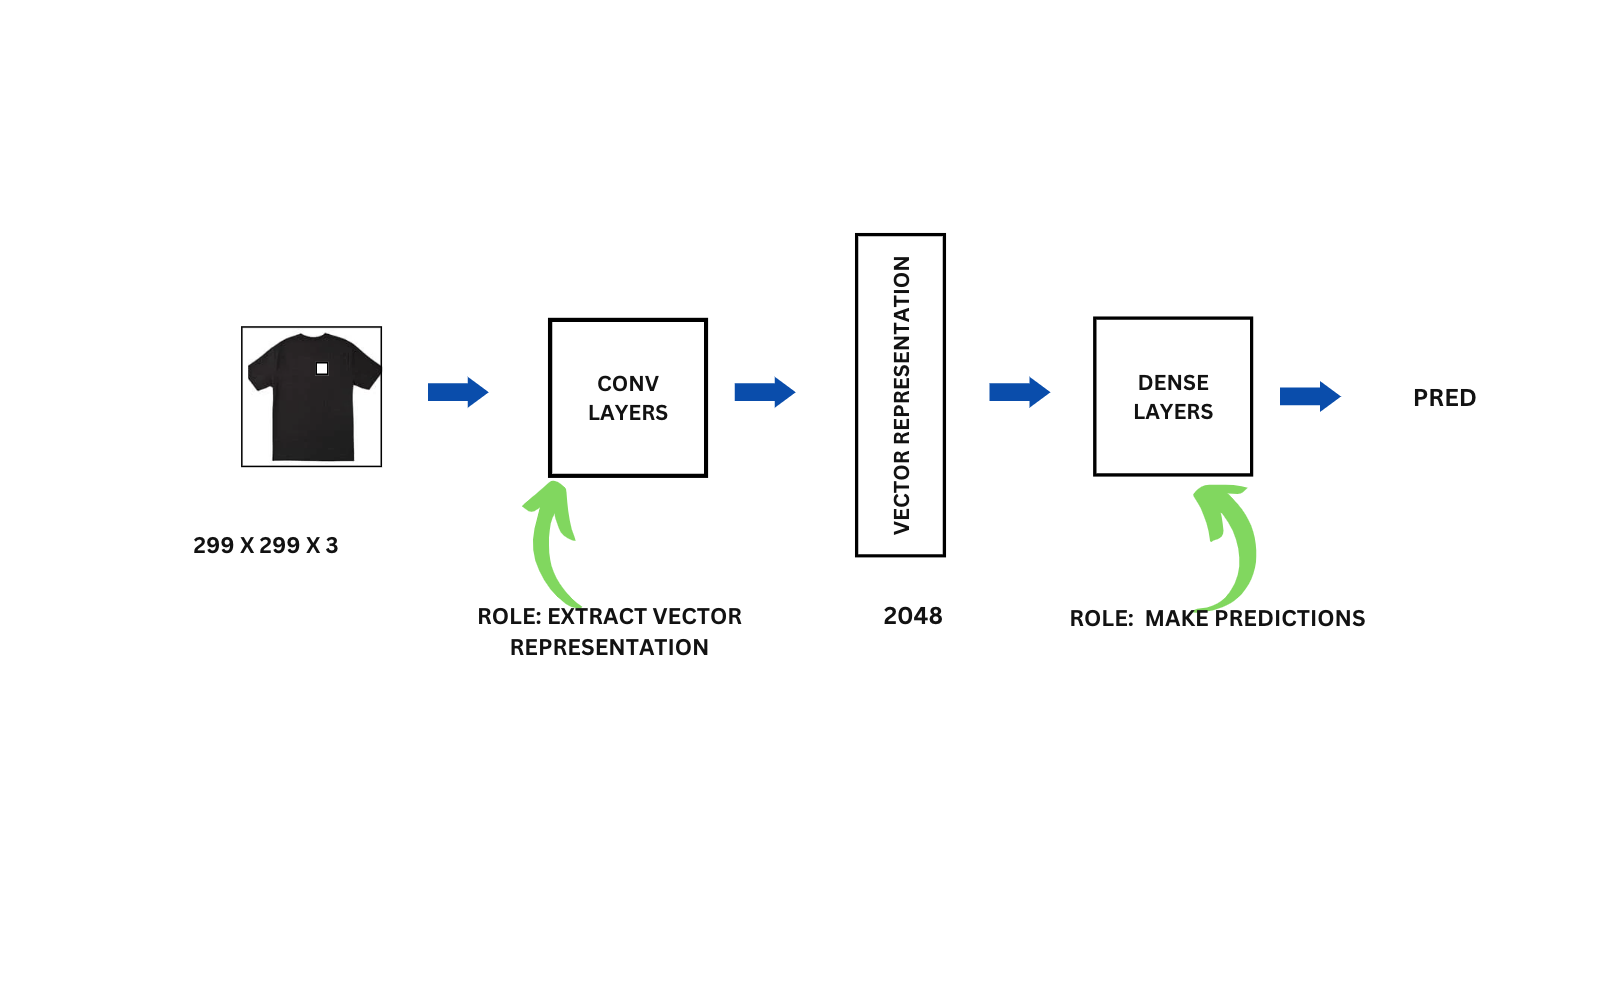

* So we take our image and pass it through a set of convolutional layers and the result of this is a vector representation of the image, so let's say if our input image is 299 by 299 by 3 then the vector representation could be something like 2048 and just this so this is a one-dimensional array this way we turn an image into a vector and this vector captures all this information about the image so all these features all these filters that we saw they extract features from the image and there could be some regions of this vector saying that there are sleeve, for example, there could be an area that corresponds to color there could be an area that corresponds to I don't know this part of the image and so on there are some numbers it's very hard to make sense of these numbers for people but neural networks make sense and they contain all the information that the neural network was able to extract from an image it's a vector so it's more convenient now to use because it has all this information, now with this victor what we can do is we can build some dense layers and we'll talk about these layers now and these layers will turn this vector representation into actually final prediction is t-shirt so the role of the convolutional layer to extract this vector representation the role of dense layers use the vector representation to make the final predictions.

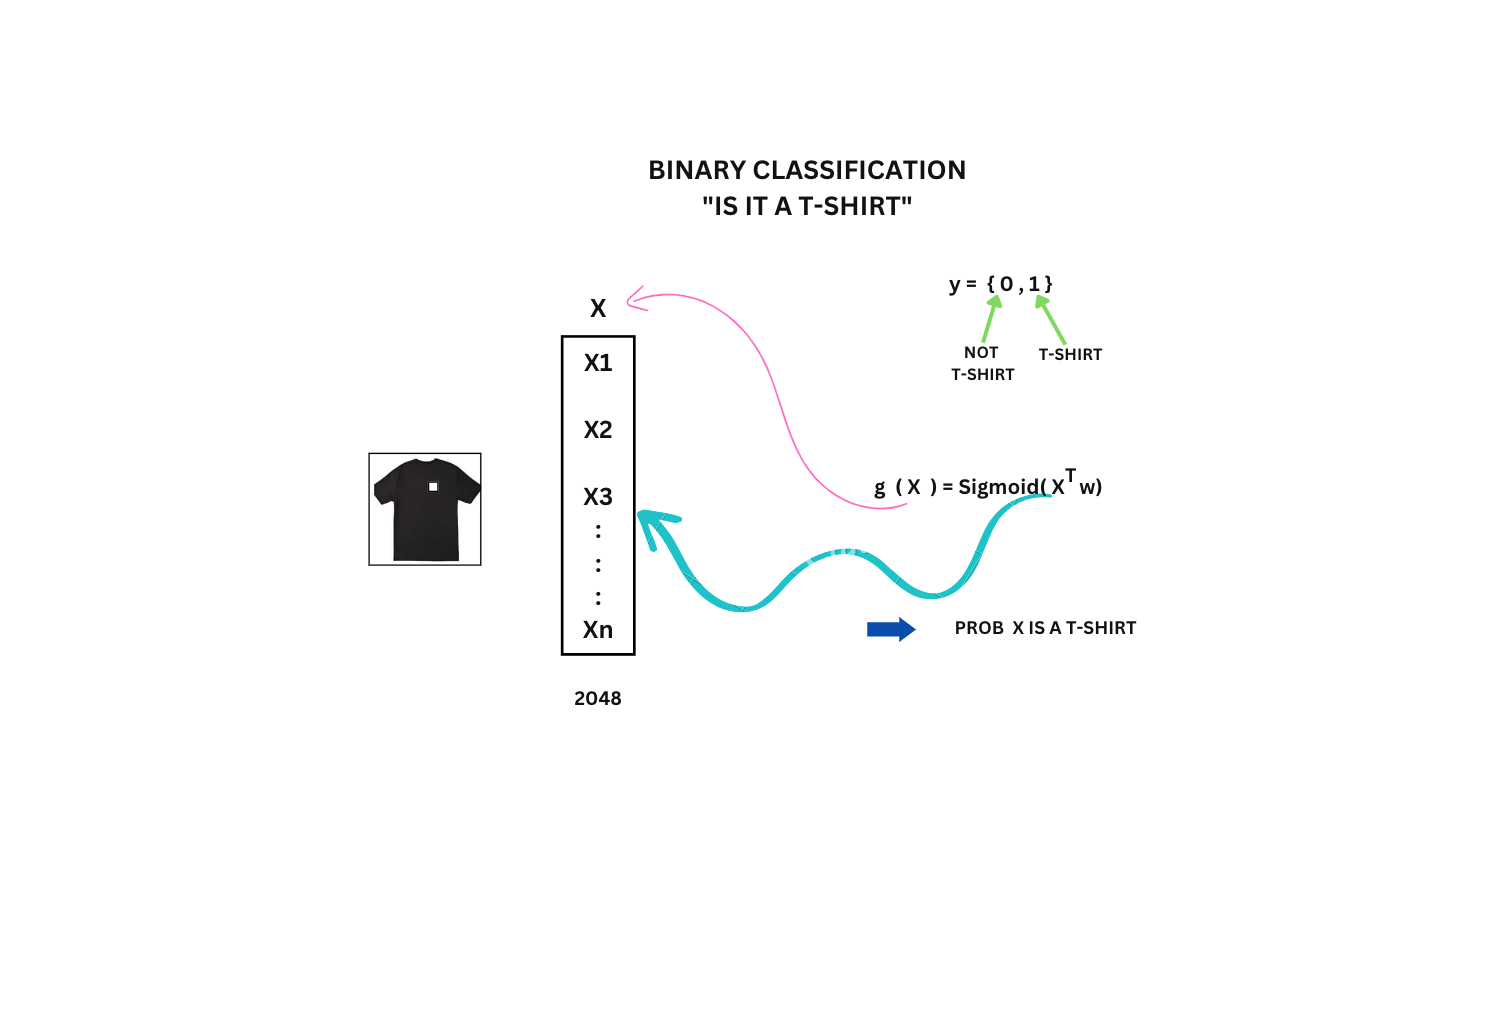

* Now let's talk more about this vector representation, so this vector representation consists of many numbers it could the dimensionality of this vector could be 2048 or 1024 something like this usually it's powers of two for some reason and remembers that was extracted from our original image, so it's our original image turned into a vector and it contains a bunch of elements, now using this vector we want to build that makes a prediction, let's say we want to make a binary model binary classification model is this a t-shirt or not, so this is our **x** and our **y** could be zero or one, **zero means, not a t-shirt** and **one means t-shirt** and what do we do in this case usually we use something like logistic regressions and then our function **g** from(x) which is this x which is the vector representation of an image our g looks like a sigmoid because this is a binary classification this logistic regression so we have sigmoid, now we have our features and we have our weights, these are the features and the weights are trained so we need to train the logistic regression model to get these weights to learn these weights and then the output of this would be the probability that this x is a t-shirt, so let's build the model like that.

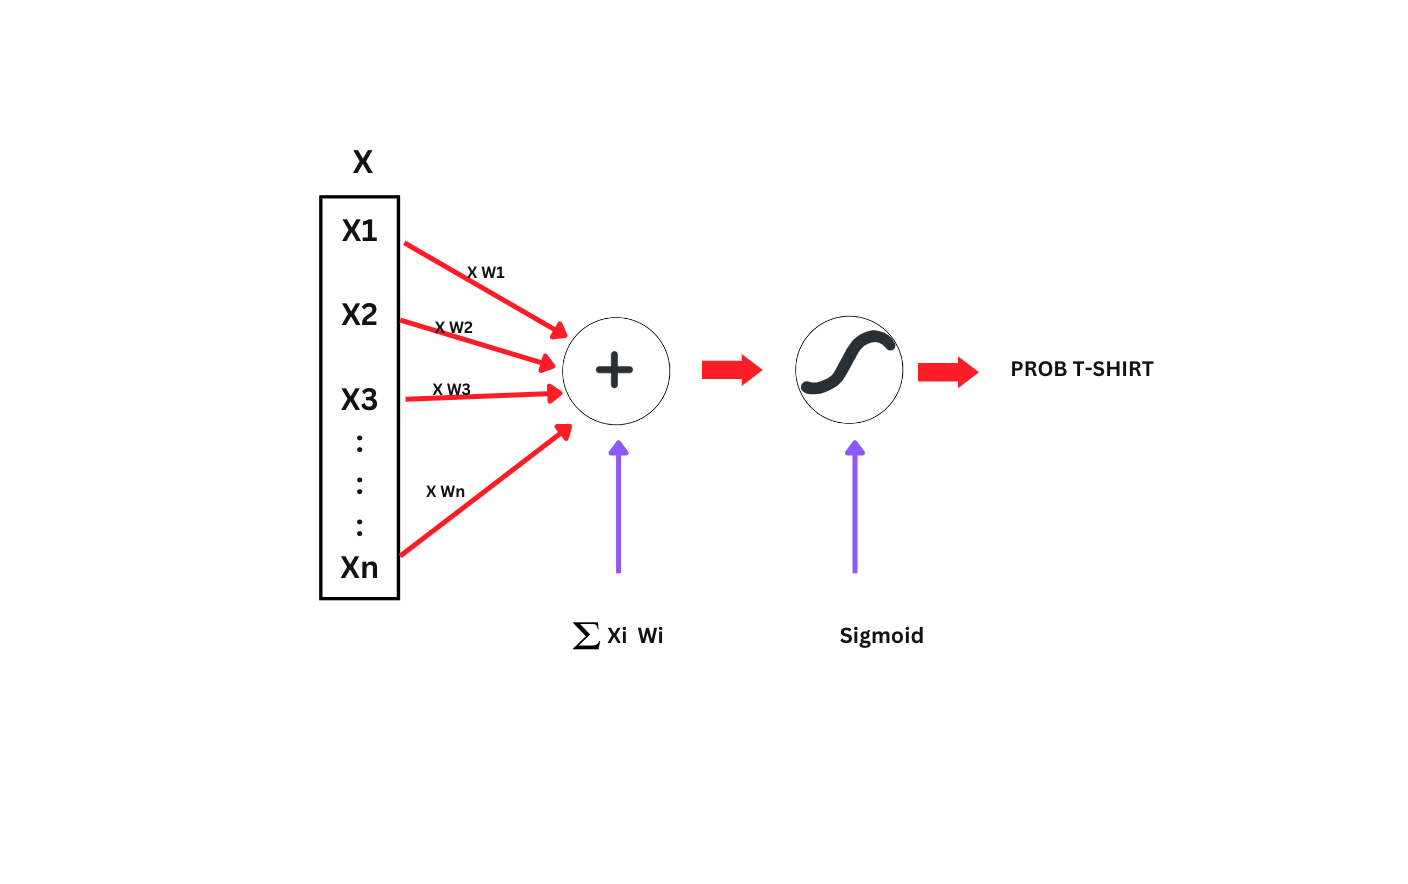

* Now I will use a slightly different notation so now I will put all the elements of our array X our feature representation has circles so we have X1, X2, X3, and so on, and then we need to make a prediction, so for that, we take all these axes we multiply them by W's so for X1 we have W1, X2 we have W2, X3 we have W3 and Xn and Wn so we multiply then so an error here means take X multiplied by W and then sum them right so we sum them all together and then at the end what we do is we take this sum and then turn it into probability by using sigmoid so this part here is the sum of all the X's and W's and this part here is sigmoid then the output of the probability of being a t-shirt this is how we do this for binary classification, let's imagine we want to build a model for multiple classes.

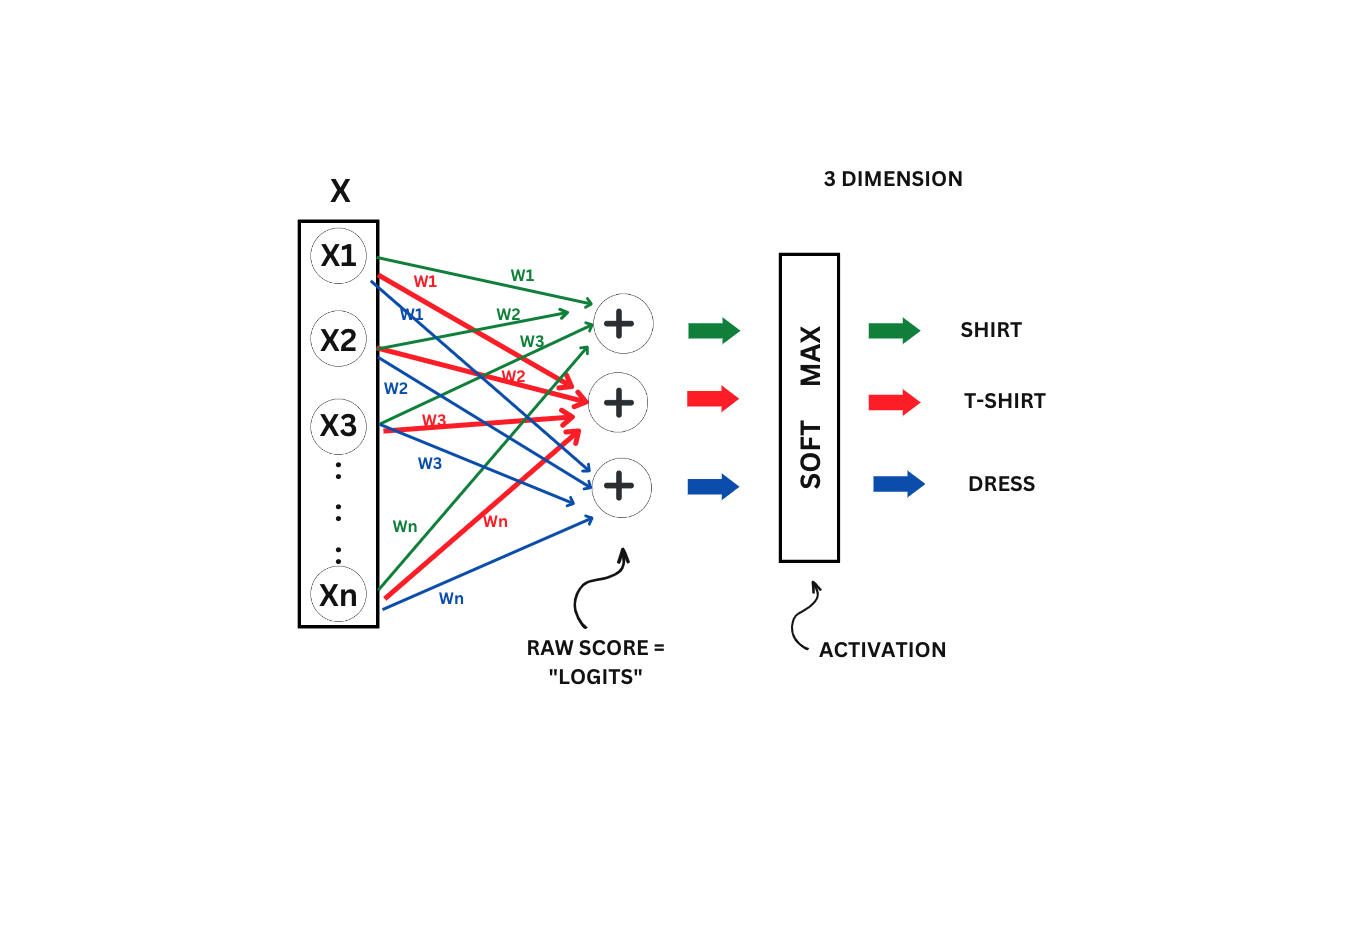

* So in addition to the t-shirt let's say we will have a shirt and we will have a dress for that we can build three models one for shirts another for t-shirts and then the third one for dresses then so we'll have now a model for shirts that also gets the same input and then it sounds it and then for this model for shirts there are also w's so W1,W2,W3,W4 these are different W's so they are W's for shirts and then we can also have the same thing for dresses and here it would have a different set of W's so I should have used different colors here so let me change that so for t-shirts we will have red Ws for shirts we'll have green ones and then for dresses we'll have blue, so now we have three models but instead of using sigmoid in this case we actually should have something, I'll put something like that here it's a sigmoid for multiple classes called softmax similar to sigmoid but it's a generalization of sigmoid to multiple classes and then the output will have three numbers three-dimensional output the first component will contain the probability of this X being a short then the second will be the probability of this X being a t-shirt and then the last one probability of this X being address we have quite a  few errors here the output, the output contains three components that there is a connection between this X our vector representation and the output so this is the input.

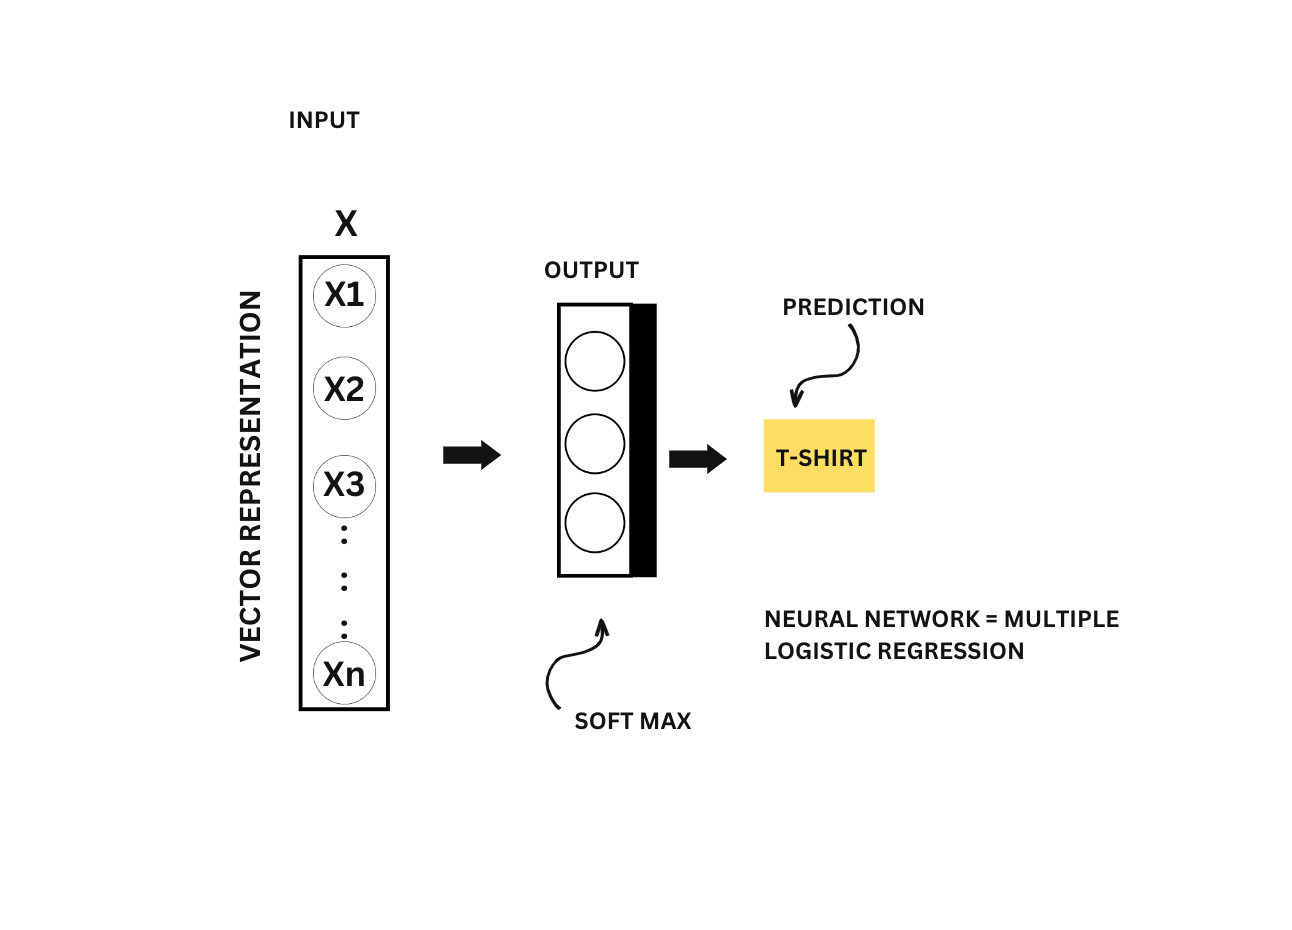

* And if the vector representation condensed t-shirt this will be our prediction so what we see here is we put multiple logistic regression together and as a result, we got a neural network.

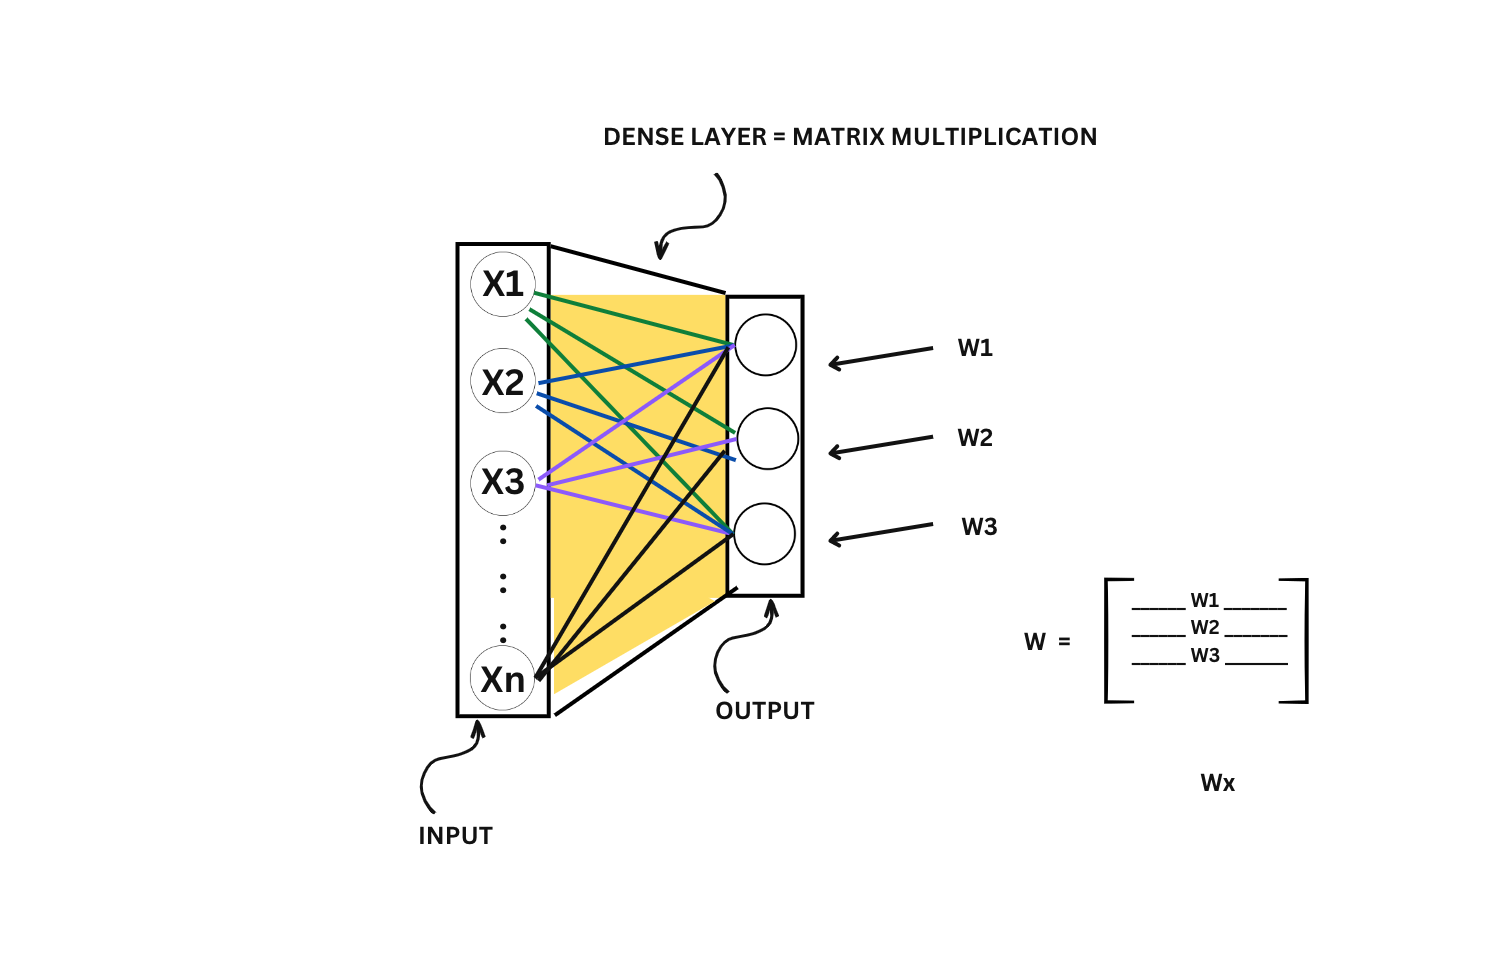

* Neural network like that so this layer is called the dense layer this is the input to the dense layer and output to the dense layer the reason it's called dense is you remember that each element of the input is connected to each element of the output so we have something like that here it's a lot of connections this area here is dense so it's dense because it connects each element of the input will each element of the output and actual transformation here is called a dense layer and remember that for each of this output we have a W so we can call for this one it says W1 for this one W2 W3 and if we put all these W's together we get one big W this W it has all the W's as rows and then if our X is a column vector then to transform the input to output all we need to do is multiply W by X so a dense layer is nothing else by matrix multiplication and we can put multiple dense layers together.

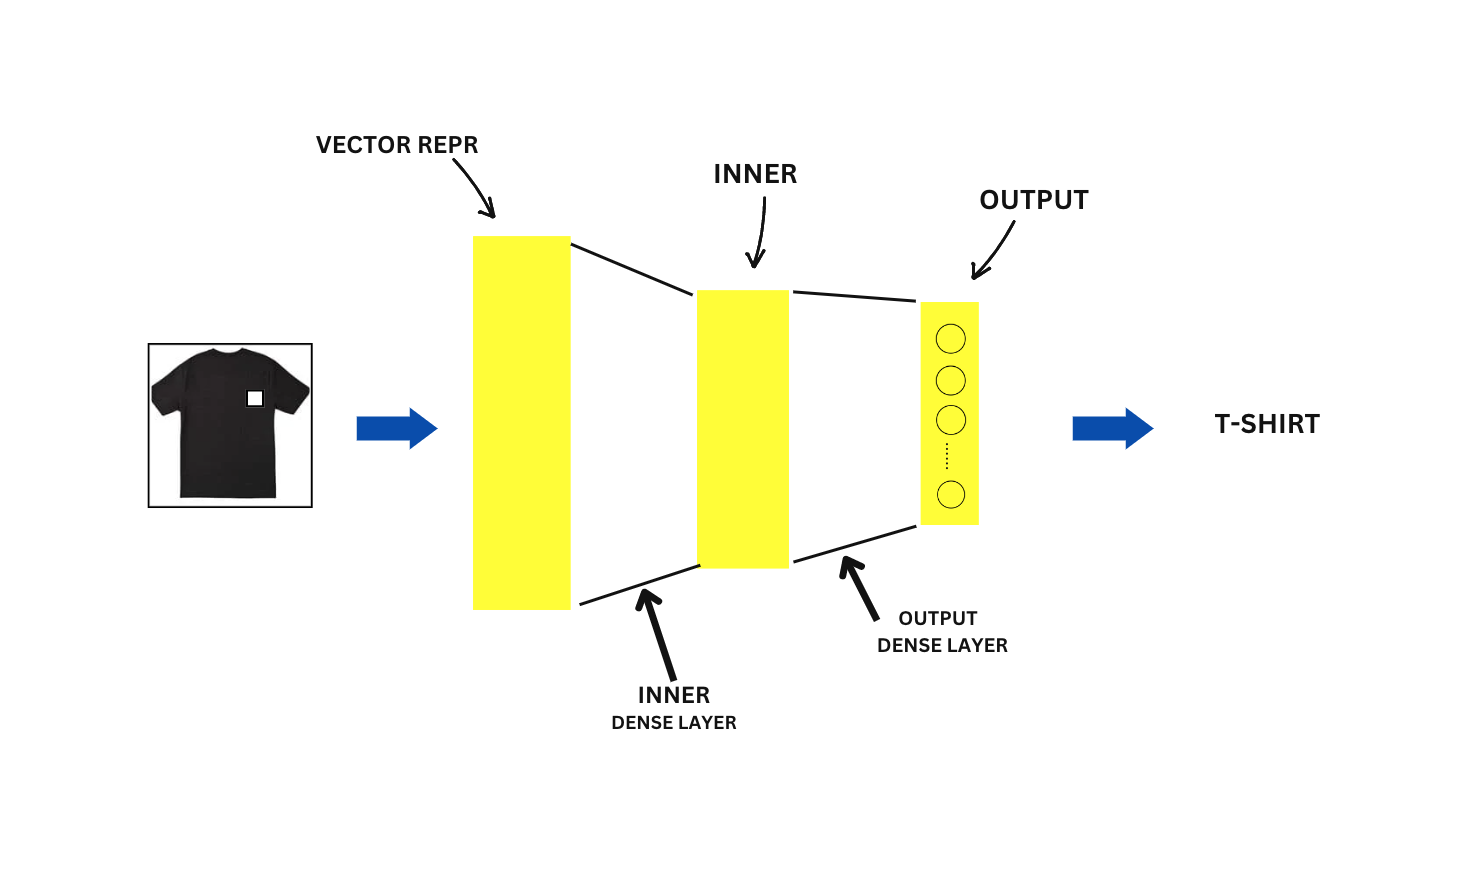

* We have our input our vector representation then we have the same then we have one dense layer and let's say we have another dense layer so this is our vector representation and this is our output and the layer between is called the inner layer and it's more like actually this more like the output of the inner layer the actual layer is here the connection between outputs so this is first dense layer or let's say inner dense layer and this would be the final dense layer for predictions.
* So we get our image here we turn this image into a vector it goes through so there's some vector representation then we convert this vector and representation into some inner representation and then we finally convert it to output and then from this output should be 10 then you select one with the highest value which hopefully should be t-shirt.


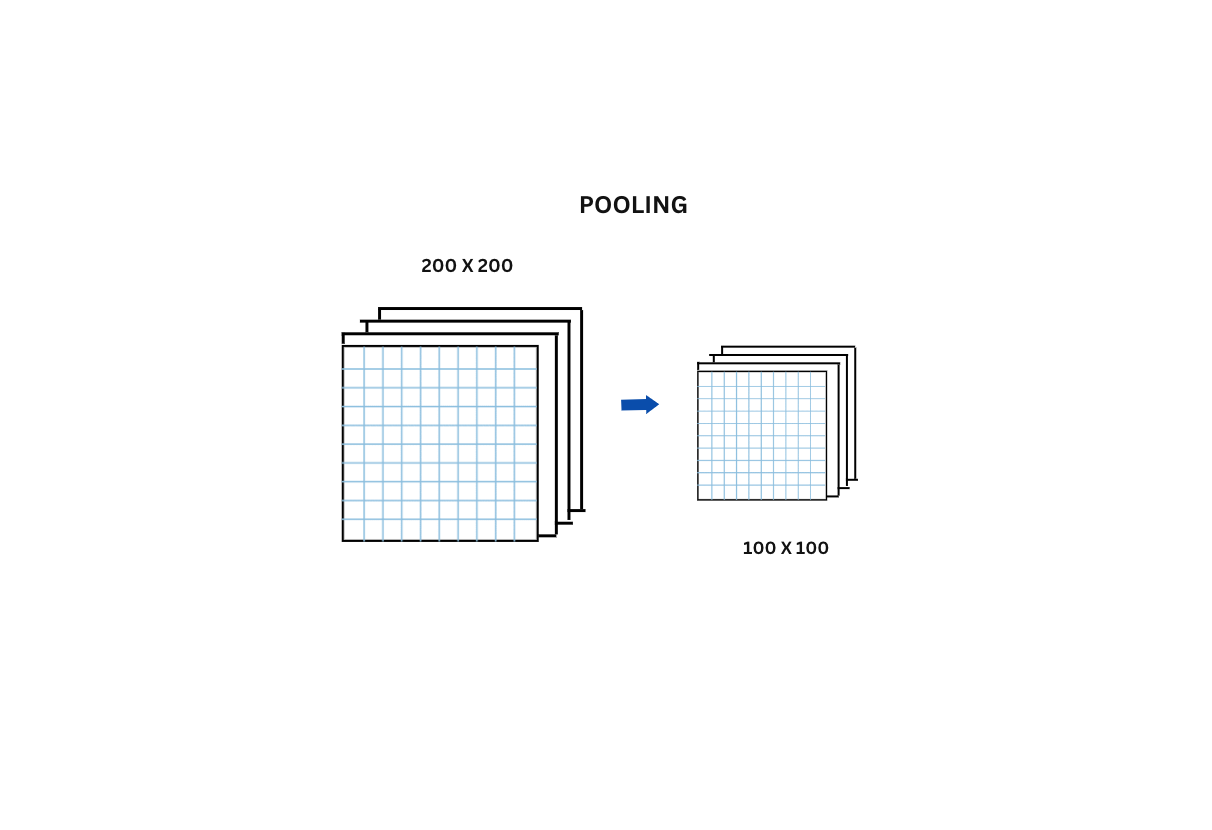

## **Pooling Layer**

* What pooling does it takes and makes it smaller, the reason it's doing it for making a neural network smaller for forcing it to have fewer parameters, let's say this one is 200 by 200 after pooling it will be 100 by 100 for example so it will shrink it two times.

next- 8.5 Transfer learning (video 5)- week8-1b